<h1>K-Means Clustering Implementation

This notebook implements the K-Means clustering algorithm from scratch. It includes methods for initializing centroids, assigning clusters, moving centroids, and fitting the model to data. Additionally, helper functions for calculating distances between centroids, within-cluster sum of squares (WCSS), and determining the optimal number of clusters using the elbow method are provided.

Importing required hearder files

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

<h2>KMeans Class</h2>
The KMeans class encapsulates the K-Means clustering algorithm. It includes methods for initializing centroids, assigning clusters, moving centroids, and fitting the model to the data.

In [2]:
class KMeans:
    def __init__(self, k, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    #This method assigns each data point to the nearest centroid based on Euclidean distance.
    def assign_cluster(self, X):
        cluster_group = []
        for row in X:
            distances = [np.sqrt(np.sum((row - centroid) ** 2)) for centroid in self.centroids]
            cluster_group.append(np.argmin(distances))
        return np.array(cluster_group)

    #This method recalculates the position of each centroid as the mean of all data points assigned to it.
    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for cluster in range(self.k):
            new_centroids.append(X[cluster_group == cluster].mean(axis=0))
        return np.array(new_centroids)

    #This method initializes the centroids using the K-means++ algorithm to improve convergence speed and cluster quality.
    def initialize_centroids(self, X):
        # Initialize centroids using K-means++ algorithm
        centroids = [X[np.random.randint(X.shape[0])]]
        while len(centroids) < self.k:
            distances = np.array([min([np.linalg.norm(x - c) for c in centroids]) for x in X])
            probabilities = distances / distances.sum()
            cum_probabilities = probabilities.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cum_probabilities):
                if r < p:
                    i = j
                    break
            centroids.append(X[i])
        self.centroids = np.array(centroids)

    #This method fits the K-Means model to the data by iteratively assigning clusters and moving centroids until convergence or the maximum number of iterations is reached.
    def fit(self, X):
        self.initialize_centroids(X)

        for _ in range(self.max_iter):
            cluster_group = self.assign_cluster(X)
            new_centroids = self.move_centroids(X, cluster_group)
            
            if np.allclose(self.centroids, new_centroids, rtol=1e-6):
                break
            
            self.centroids = new_centroids
        return cluster_group

<h2>Helper Functions</h2>
These functions help calculate distances between centroids and within-cluster sum of squares (WCSS), and find the optimal number of clusters using the elbow method.

<h3>Calculate Distances Between Centroids</h3>
This function calculates the pairwise Euclidean distances between centroids.

In [3]:
def calculate_distances(centroids):
    distances = []
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            dist = np.sqrt(np.sum((centroids[i] - centroids[j]) ** 2))
            distances.append((f'Cluster {i+1} and Cluster {j+1}', dist))
    return distances

<h3>Calculate WCSS (Within-Cluster Sum of Squares)</h3>
This function calculates the WCSS for a given set of centroids and cluster assignments.

In [4]:
def calculate_wcss(X, centroids, clusters):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

<h3>Elbow Method</h3>
This function applies the K-Means algorithm for a range of k values and calculates the WCSS for each. It helps in determining the optimal number of clusters by identifying the 'elbow point' in the WCSS plot.

In [5]:
# Function to apply K-means clustering for a range of k values and calculate WCSS
def elbow_method(X, max_k):
    wcss_values = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(k=k)
        clusters = kmeans.fit(X)
        wcss = calculate_wcss(X, kmeans.centroids, clusters)
        wcss_values.append(wcss)
    return wcss_values

In [6]:
# Function to find the elbow point
def find_elbow_point(wcss_values):
    # Calculate differences between consecutive WCSS values
    differences = np.diff(wcss_values)
    
    # Find the index where the difference is less than 10% of the previous difference
    elbow_index = 0
    for i in range(1, len(differences)):
        decrease = wcss_values[i-1] - wcss_values[i]
        previous_decrease = wcss_values[i-2] - wcss_values[i-1]
        if decrease < 0.1 * previous_decrease:
            elbow_index = i
            break

    return elbow_index 

<h2>Main Function</h2>
Load the image, extract light points, apply the elbow method to determine the number of clusters, and then apply K-means clustering.

Load image and convert to numpy array

In [7]:
image_path = 'Images/1.png'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image_array = np.array(image)

Extract light points (coordinates where pixel value is 255)

In [8]:
light_points = np.column_stack(np.where(image_array == 255))
X = light_points

Set the maximum number of clusters to try

In [9]:
max_k = 10

Apply elbow method

In [10]:
wcss_values = elbow_method(X, max_k)
# Set the number of clusters (cities)
k = find_elbow_point(wcss_values)

Apply K-means clustering

In [11]:
kmeans = KMeans(k=k)
clusters = kmeans.fit(X)

Calculate distances between centroids

In [12]:
centroids = kmeans.centroids
distances = calculate_distances(centroids)

Prepare table data

In [13]:
table_data = [["Clusters", "Distances"]]
table_data.extend([[pair, f"{dist:.6f}"] for pair, dist in distances])

<h3>Plot the clusters(cities) and table of distance between cities

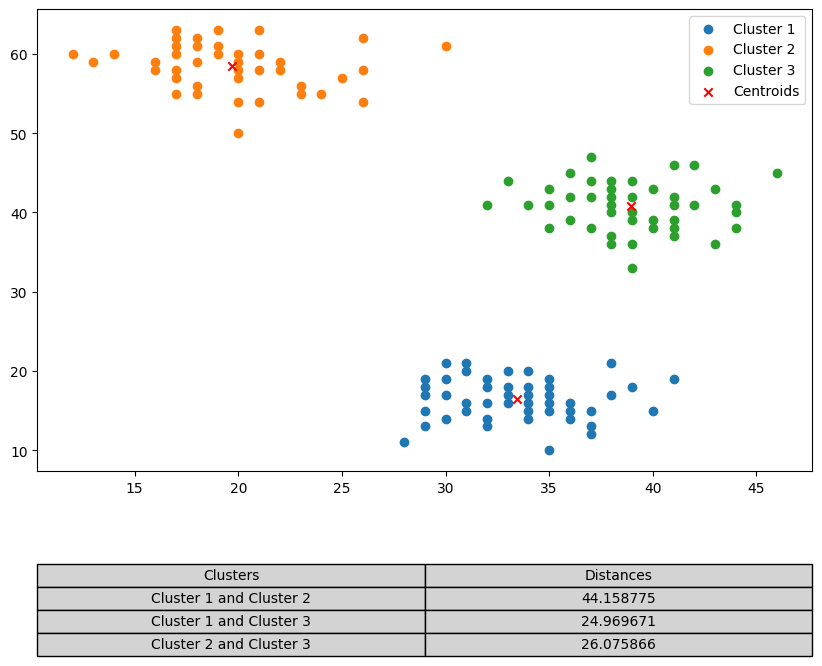

In [14]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', bbox=[0, -0.4, 1, 0.2], cellColours=[['lightgrey']*len(table_data[0])]*len(table_data), colWidths=[0.5, 0.5], rowLoc='center')
plt.show()

<h3>Repeat this for image 2 

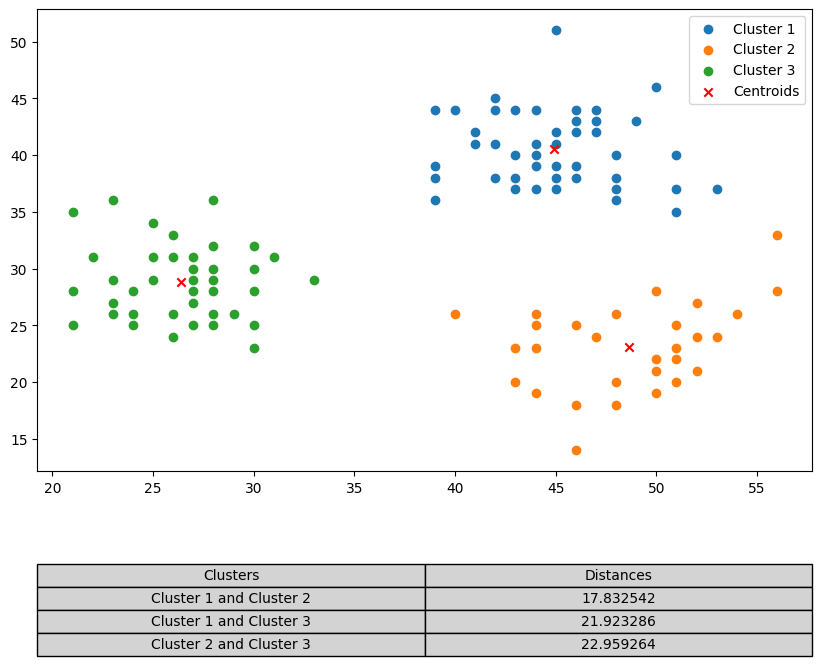

In [15]:
image_path = 'Images/2.png'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image_array = np.array(image)

light_points = np.column_stack(np.where(image_array == 255))
X = light_points

max_k = 10

wcss_values = elbow_method(X, max_k)
# Set the number of clusters (cities)
k = find_elbow_point(wcss_values)

kmeans = KMeans(k=k)
clusters = kmeans.fit(X)

centroids = kmeans.centroids
distances = calculate_distances(centroids)

table_data = [["Clusters", "Distances"]]
table_data.extend([[pair, f"{dist:.6f}"] for pair, dist in distances])

plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', bbox=[0, -0.4, 1, 0.2], cellColours=[['lightgrey']*len(table_data[0])]*len(table_data), colWidths=[0.5, 0.5], rowLoc='center')
plt.show()

<h3>Repeat this again for image 3

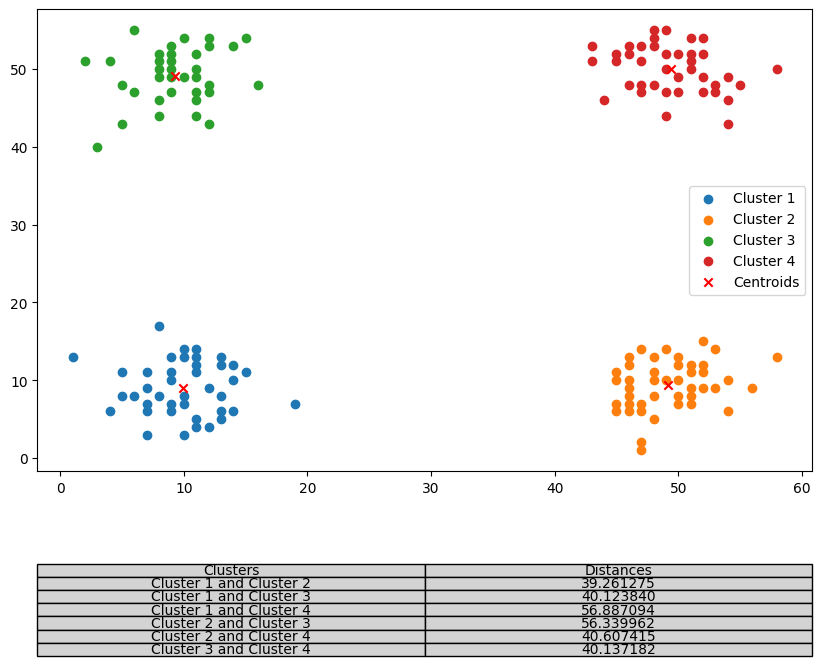

In [16]:
image_path = 'Images/3.png'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image_array = np.array(image)

light_points = np.column_stack(np.where(image_array == 255))
X = light_points

max_k = 10

wcss_values = elbow_method(X, max_k)
# Set the number of clusters (cities)
k = find_elbow_point(wcss_values)

kmeans = KMeans(k=k)
clusters = kmeans.fit(X)

centroids = kmeans.centroids
distances = calculate_distances(centroids)

table_data = [["Clusters", "Distances"]]
table_data.extend([[pair, f"{dist:.6f}"] for pair, dist in distances])

plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', bbox=[0, -0.4, 1, 0.2], cellColours=[['lightgrey']*len(table_data[0])]*len(table_data), colWidths=[0.5, 0.5], rowLoc='center')
plt.show()

<h3>Repeat this again for image 4

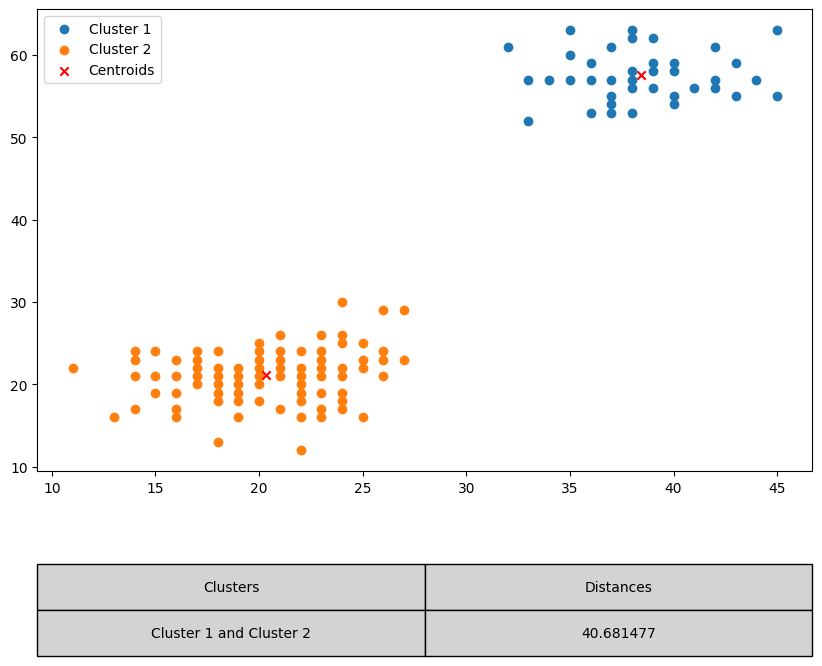

In [17]:
image_path = 'Images/4.png'
image = Image.open(image_path).convert('L')  # Convert image to grayscale
image_array = np.array(image)

light_points = np.column_stack(np.where(image_array == 255))
X = light_points

max_k = 10

wcss_values = elbow_method(X, max_k)
# Set the number of clusters (cities)
k = find_elbow_point(wcss_values)

kmeans = KMeans(k=k)
clusters = kmeans.fit(X)

centroids = kmeans.centroids
distances = calculate_distances(centroids)

table_data = [["Clusters", "Distances"]]
table_data.extend([[pair, f"{dist:.6f}"] for pair, dist in distances])

plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center', bbox=[0, -0.4, 1, 0.2], cellColours=[['lightgrey']*len(table_data[0])]*len(table_data), colWidths=[0.5, 0.5], rowLoc='center')
plt.show()

<h3>Thank You</h3>